In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
import pandas as pd
from scipy import ndimage
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
from sklearn.model_selection import KFold

In [18]:
def calculate_centroid_and_area(image):
    
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(img_hsv,(31, 69, 20), (82, 255, 255))
    
    area = np.sum(mask)/255
    centroid = ndimage.center_of_mass(mask)
    
    return [area,centroid]

In [19]:
# Assumes there are an equal number of top and front images
number_of_files = len([name for name in os.listdir('../Images') if name[0]!="."])
number_of_plants = int(number_of_files / 2)

results = pd.DataFrame(columns=['Plant_number', 'Area_front', 'Centroid_front', 'Area_top', 'Centroid_top'])

for x in range(number_of_plants):
    row = []
    
    row.append("Plant" + str(x+1))
    
    image_front = cv2.imread(f'../Images/Plant{x+1}_front_Color.png')
    image_top = cv2.imread(f'../Images/Plant{x+1}_top_Color.png')
    
    front_result = calculate_centroid_and_area(image_front)
    top_result = calculate_centroid_and_area(image_top)
    
    row = row + front_result + top_result
    
    results.loc[len(results)] = row
    
    

In [20]:
PlantData = pd.read_csv("../PlantData.csv")

In [21]:
Data = results.join(PlantData.set_index('Plant_number'), on='Plant_number')

In [25]:
# Separate Target Variable and Predictor Variables
TargetVariable=['LAI']
Predictors=['Area_top','Area_front']
 
X=Data[Predictors].values
y=Data[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

i=0
k=5
cv = KFold(n_splits=k, random_state=1, shuffle=True)
cv.get_n_splits(X)
mae=np.zeros(k)
for train_index, test_index in cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    pipeline_optimizer = TPOTRegressor(generations=10, population_size=20, cv=5,
                                        random_state=42, verbosity=2)
    pipeline_optimizer.fit(X_train, y_train)
    close_predictions = pipeline_optimizer.predict(X_test)
    print(close_predictions)
    close_predictions = TargetVarScalerFit.inverse_transform(close_predictions.reshape(-1, 1))
    close_predictions = close_predictions.flatten()
    y_test = TargetVarScalerFit.inverse_transform(y_test)
    y_test = y_test.flatten()
    print(close_predictions)
    print(y_test)
    print(y_test.shape)
    mae[i] = sum(abs(close_predictions - y_test)) / y_test.shape[0]
    i+=1
print(mae)
mae_average = np.average(mae)
maepercent_average = mae_average/np.average(Data['LAI'])
print(maepercent_average)

C:\Users\Jeroen.cro\Anaconda3\envs\LAI-prediction-2\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                                                             
Generation 1 - Current best internal CV score: -0.32382695895386815
                                                                             
Generation 2 - Current best internal CV score: -0.32382695895386815
                                                                             
Generation 3 - Current best internal CV score: -0.32237126534730975
                                                                              
Generation 4 - Current best internal CV score: -0.32237126534730975
                                                                              
Generation 5 - Current best internal CV score: -0.32237126534730975
                                                                              
Generation 6 - Current best internal CV score: -0.3223712653472839
                                                                              
Generation 7 - Current best internal CV sco

C:\Users\Jeroen.cro\Anaconda3\envs\LAI-prediction-2\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                                                             
Generation 1 - Current best internal CV score: -0.2812156187460142
                                                                             
Generation 2 - Current best internal CV score: -0.2502626182074331
                                                                             
Generation 3 - Current best internal CV score: -0.21426392686596113
                                                                              
Generation 4 - Current best internal CV score: -0.20620237248183884
                                                                              
Generation 5 - Current best internal CV score: -0.20620237248183884
                                                                              
Generation 6 - Current best internal CV score: -0.20620237248183884
                                                                              
Generation 7 - Current best internal CV scor

C:\Users\Jeroen.cro\Anaconda3\envs\LAI-prediction-2\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                                                             
Generation 1 - Current best internal CV score: -0.31143763191424123
                                                                             
Generation 2 - Current best internal CV score: -0.31143763191424123
                                                                             
Generation 3 - Current best internal CV score: -0.31143763191424123
                                                                              
Generation 4 - Current best internal CV score: -0.30755812293059426
                                                                              
Generation 5 - Current best internal CV score: -0.29244947678861
                                                                              
Generation 6 - Current best internal CV score: -0.29244947678861
                                                                              
Generation 7 - Current best internal CV score: -

C:\Users\Jeroen.cro\Anaconda3\envs\LAI-prediction-2\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                                                             
Generation 1 - Current best internal CV score: -0.47081926501649896
                                                                             
Generation 2 - Current best internal CV score: -0.47081926501649896
                                                                             
Generation 3 - Current best internal CV score: -0.44747439866451666
                                                                             
Generation 4 - Current best internal CV score: -0.4209198206518344
                                                                              
Generation 5 - Current best internal CV score: -0.4137241889364792
                                                                              
Generation 6 - Current best internal CV score: -0.3215365806952573
                                                                              
Generation 7 - Current best internal CV score:

C:\Users\Jeroen.cro\Anaconda3\envs\LAI-prediction-2\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                                                             
Generation 1 - Current best internal CV score: -0.39589399789423113
                                                                             
Generation 2 - Current best internal CV score: -0.39589399789423113
                                                                             
Generation 3 - Current best internal CV score: -0.23546599677478292
                                                                              
Generation 4 - Current best internal CV score: -0.23546599677478292
                                                                              
Generation 5 - Current best internal CV score: -0.23546599677478292
                                                                              
Generation 6 - Current best internal CV score: -0.22854743021133056
                                                                              
Generation 7 - Current best internal CV sc

67.87093207978056
   Actuals  Predictions  Plant Numbers
2   964.64   951.546839              1
0  1199.86  1061.575843              2
3  1216.18  1289.154634              3
9  1220.36  1212.425052              4
8  1321.61  1303.040089              5
7  1335.69  1253.627799              6
5  1343.02  1439.829413              7
6  1358.58  1273.334434              8
4  1363.92  1394.401423              9
1  1606.91  1473.656094             10


C:\Users\Jeroen.cro\Anaconda3\envs\LAI-prediction-2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


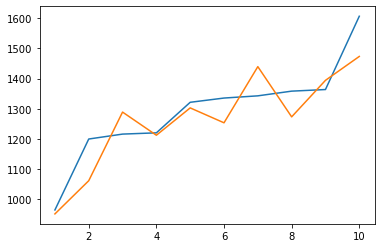

In [8]:

close_predictions = pipeline_optimizer.predict(X_test)   

mae = sum(abs(close_predictions - y_rem)) / y_rem.shape[0]


print(mae)
RF_results = pd.DataFrame(columns = ['Actuals'])
RF_results['Predictions'] = close_predictions
RF_results['Actuals'] = y_rem.to_list()




RF_results.sort_values(by=['Actuals'],inplace = True)
RF_results['Plant Numbers'] = np.arange(1,11).tolist()
print(RF_results)

plt.plot(RF_results['Plant Numbers'],RF_results['Actuals'],RF_results['Plant Numbers'],RF_results['Predictions'])

In [9]:
mae/np.average(RF_results['Actuals'])

0.05248792769477809